<a href="https://colab.research.google.com/github/NoshinTarannum/Sentiment-Recognition-Using-NLP/blob/main/CSE422_AI_Project_Sentiment_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Read Dataset: .csv/.xlsx to DataFrame**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Lab/Project/train_dataset_mod.csv')

# **Dataset Analysis**

- shape
- columns
- head()
- sample()
- describe()
- finding categorical features
- checking if any null/nan values
- filtering data instances based on indices
- filtering data instances based on conditional statements


In [ ]:
data.shape

(40100, 2)

In [ ]:
data.columns

Index(['text', 'label'], dtype='object')

In [ ]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Loved today's show!!! It was a variety and not...,1
4,Even though I have great interest in Biblical ...,0


In [ ]:
data.sample(5)

,text,label
28335,"Oh man, why? ""Six Degrees"" is a show about thi...",1
3156,"What a shocker. For starters, I couldn't stand...",0
14962,I have decided to not believe what famous movi...,1
39168,it seems like if you are going to post here it...,0
38016,This is one of my all time favourites. All the...,1


In [ ]:
data.describe()

,label
count,40100.000000
mean,0.499302
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40100 entries, 0 to 40099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40055 non-null  object
 1   label   40100 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 626.7+ KB


In [ ]:
data.isnull().sum()

text     45
label     0
dtype: int64

In [ ]:
# List of indices to filter
indices_to_filter = [1, 3]

# Filter the DataFrame based on indices
filtered_df_i = data.iloc[indices_to_filter]
print(filtered_df_i)

                                                text  label
1  When I put this movie in my DVD player, and sa...      0
3  Loved today's show!!! It was a variety and not...      1


In [ ]:
# Condition to filter by
condition = data['label'] == 1

# Apply the condition to filter the DataFrame
filtered_df_c1 = data[condition]

print(filtered_df_c1)

                                                    text  label
3      Loved today's show!!! It was a variety and not...      1
5      Im a die hard Dads Army fan and nothing will e...      1
9      Finally watched this shocking movie last night...      1
11     Hilarious, clean, light-hearted, and quote-wor...      1
12     It may be the remake of 1987 Autumn's Tale aft...      1
...                                                  ...    ...
40089  Although I agree that it's a good but not grea...      1
40092  "Western Union" is something of a forgotten cl...      1
40093  This movie is an incredible piece of work. It ...      1
40096  When I first watched Flatliners, I was amazed....      1
40097  Why would this film be so good, but only gross...      1

[20022 rows x 2 columns]


In [ ]:
# Condition to filter by
condition = data['label'] == 0

# Apply the condition to filter the DataFrame
filtered_df_c0 = data[condition]

print(filtered_df_c0)

                                                    text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
4      Even though I have great interest in Biblical ...      0
6      You do realize that you've been watching the E...      0
...                                                  ...    ...
40091  My girlfriend has the habit of going to Blockb...      0
40094  When i got this movie free from my job, along ...      0
40095  My wife and I watched this movie because we pl...      0
40098  You do realize that you've been watching the E...      0
40099  Little Quentin seems to have mastered the art ...      0

[20078 rows x 2 columns]


# **Dataset Visualization**

- Dataset biased or not
- Histogram
- Scatter Plot
- Bar chart
- etc.

Dataset is not biased as there are almost equal amounts of data instances for both types of labels. Moreover, there is only one feature consisting of text, and we will be removing the duplicate rows to ensure that the text is unique.

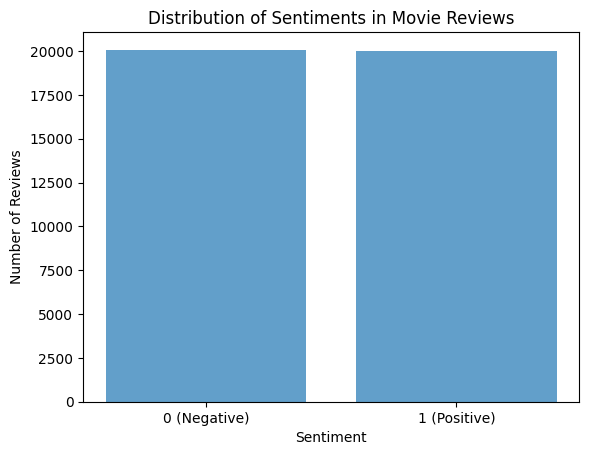

In [ ]:
# Grouping the data by label and counting the occurrences
sentiment_counts = data['label'].value_counts()

# Creating a bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values, tick_label=['0 (Negative)', '1 (Positive)'], alpha = 0.7)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments in Movie Reviews')
plt.show()

Text(0.5, 1.0, 'Distribution of Review Lengths')

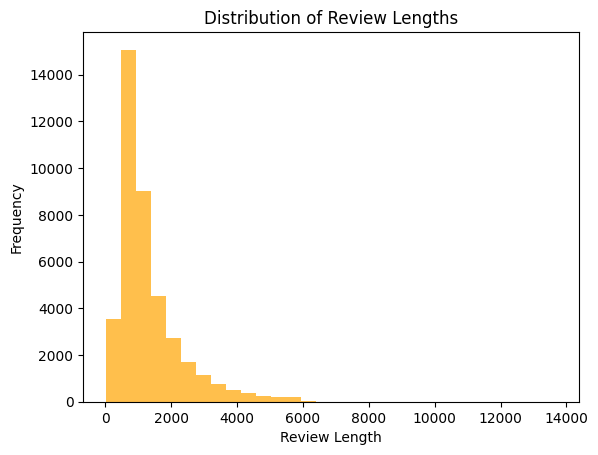

In [ ]:
# Calculate review lengths
length_reviews = data['text'].str.len().plot.hist(color = 'orange', bins=30, alpha=0.7)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')

# **Dataset Pre-processing**

- Null/NaN values handling

    a) Delete Rows

    b) Delete Columns

    c) Impute Values

- Encoding Categorical Features

- Feature Scaling

In [ ]:
# Check how many values are missing in the text column
print("Number of rows with null values in text column: ", data['text'].isnull().sum())

# Subset the data dataset
data_subset = data[data['text'].notnull()]

# Print out the shape of the subset
print("Shape after removing null values: ", data_subset.shape)

Number of rows with null values in text column:  45
Shape after removing null values:  (40055, 2)


In [ ]:
print("Shape of dataframe before dropping:", data.shape)
data = data.dropna(axis = 0, subset = ['text'])
print("Shape after dropping:", data.shape)

Shape of dataframe before dropping: (40100, 2)
Shape after dropping: (40055, 2)


In [ ]:
data.duplicated().sum()

333

In [ ]:
data.drop_duplicates(inplace=True)
print("Shape after removing duplicates: ", data.shape) # 40100-45-333

Shape after removing duplicates:  (39722, 2)


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
from textblob import TextBlob
import nltk

In [ ]:
# Word count in each review
data['word_count'] = data['text'].apply(lambda x: len(x.split()))
data.head(5)

,text,label,word_count
0,I grew up (b. 1965) watching and loving the Th...,0,151
1,"When I put this movie in my DVD player, and sa...",0,326
2,Why do people who do not know what a particula...,0,184
3,Loved today's show!!! It was a variety and not...,1,150
4,Even though I have great interest in Biblical ...,0,69


In [ ]:
# Calculating polarity (quantitative) of the reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
data['polarity_val'] = data['text'].apply(get_polarity)
data.head()

,text,label,word_count,polarity_val
0,I grew up (b. 1965) watching and loving the Th...,0,151,0.123287
1,"When I put this movie in my DVD player, and sa...",0,326,0.131345
2,Why do people who do not know what a particula...,0,184,-0.041369
3,Loved today's show!!! It was a variety and not...,1,150,0.232120
4,Even though I have great interest in Biblical ...,0,69,-0.135714


In [ ]:
# Calculating polarity (qualitative) of the reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"

# Applying polarity function
data['polarity_qual'] = data['text'].apply(get_polarity)
data.head()

,text,label,word_count,polarity_val,polarity_qual
0,I grew up (b. 1965) watching and loving the Th...,0,151,0.123287,Weakly Positive
1,"When I put this movie in my DVD player, and sa...",0,326,0.131345,Weakly Positive
2,Why do people who do not know what a particula...,0,184,-0.041369,Weakly Negative
3,Loved today's show!!! It was a variety and not...,1,150,0.232120,Weakly Positive
4,Even though I have great interest in Biblical ...,0,69,-0.135714,Weakly Negative


In [ ]:
data['polarity_qual'].value_counts()

Weakly Positive      26105
Weakly Negative       9068
Positive              3922
Negative               461
Strongly Positive      121
Neutral                 30
Strongly Negative       15
Name: polarity_qual, dtype: int64

In [ ]:
import string

# Remove punctuation from the reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data.head()

,text,label,word_count,polarity_val,polarity_qual
0,I grew up b 1965 watching and loving the Thund...,0,151,0.123287,Weakly Positive
1,When I put this movie in my DVD player and sat...,0,326,0.131345,Weakly Positive
2,Why do people who do not know what a particula...,0,184,-0.041369,Weakly Negative
3,Loved todays show It was a variety and not sol...,1,150,0.232120,Weakly Positive
4,Even though I have great interest in Biblical ...,0,69,-0.135714,Weakly Negative


In [ ]:
# Creating a function to remove numbers from the reviews
import re

def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['text'] = data['text'].apply(drop_numbers)
data.head()

,text,label,word_count,polarity_val,polarity_qual
0,I grew up b watching and loving the Thunderbi...,0,151,0.123287,Weakly Positive
1,When I put this movie in my DVD player and sat...,0,326,0.131345,Weakly Positive
2,Why do people who do not know what a particula...,0,184,-0.041369,Weakly Negative
3,Loved todays show It was a variety and not sol...,1,150,0.232120,Weakly Positive
4,Even though I have great interest in Biblical ...,0,69,-0.135714,Weakly Negative


In [ ]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# For lemmatisation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word.lower()) for word in text_tokens]
    return ' '.join(text_lemm)

data['text'] = data['text'].apply(lemmatise)
data.head()

,text,label,word_count,polarity_val,polarity_qual
0,i grew up b watching and loving the thunderbir...,0,151,0.123287,Weakly Positive
1,when i put this movie in my dvd player and sat...,0,326,0.131345,Weakly Positive
2,why do people who do not know what a particula...,0,184,-0.041369,Weakly Negative
3,loved today show it wa a variety and not solel...,1,150,0.232120,Weakly Positive
4,even though i have great interest in biblical ...,0,69,-0.135714,Weakly Negative


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# To remove stopwords
from nltk.corpus import stopwords

def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

data['text'] = data['text'].apply(remove_stopword)
data.head()

,text,label,word_count,polarity_val,polarity_qual
0,grew b watching loving thunderbird mate school...,0,151,0.123287,Weakly Positive
1,put movie dvd player sat coke chip expectation...,0,326,0.131345,Weakly Positive
2,people know particular time past wa like feel ...,0,184,-0.041369,Weakly Negative
3,loved today show wa variety solely cooking wou...,1,150,0.232120,Weakly Positive
4,even though great interest biblical movie wa b...,0,69,-0.135714,Weakly Negative


In [ ]:
# TF-IDF representation
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 7000) # max_features set considering limited RAM
x = tf.fit_transform(data['text']).toarray()
y = data.iloc[:, 1].values

print(x.shape)
print(y.shape)

(39722, 7000)
(39722,)


# **Feature Selection**

In [ ]:
# Drop the 'text' and 'polarity_qual' features
data_num = data.drop(['text', 'polarity_qual'], axis=1)

In [ ]:
data_num.head(5)

,label,word_count,polarity_val
0,0,151,0.123287
1,0,326,0.131345
2,0,184,-0.041369
3,1,150,0.232120
4,0,69,-0.135714


<Axes: >

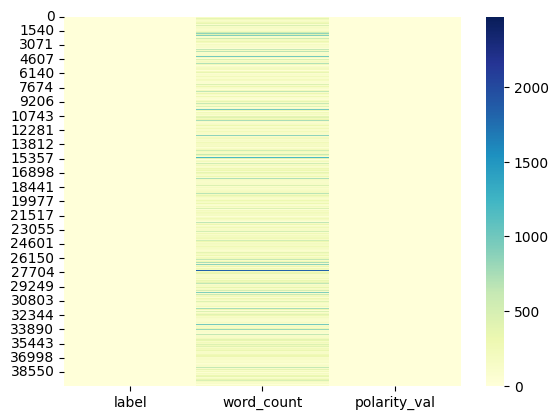

In [ ]:
# Correlation mapping: heatmap
sns.heatmap(data_num, cmap = 'YlGnBu')

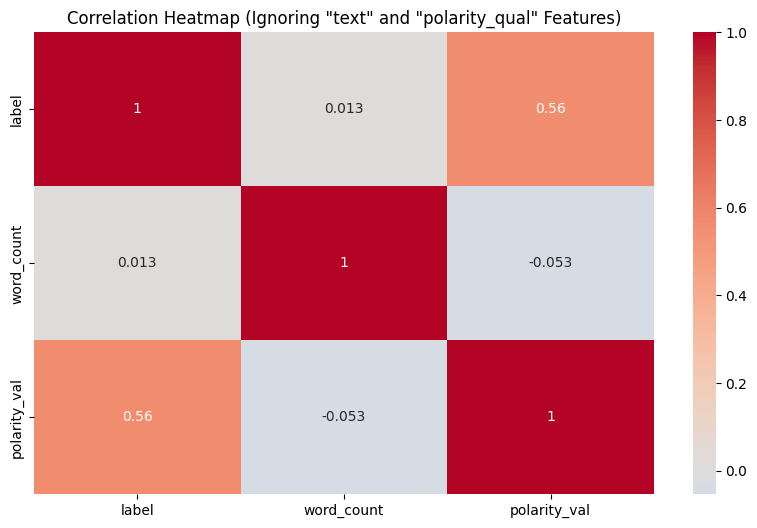

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_num.corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Ignoring "text" and "polarity_qual" Features)')
plt.show()

We can observe a higher correlation between word count and label (sentiment) compared to polarity. This might be a consequence of several factors:

- Review Length and Expressiveness
- Neutral Reviews
- Language Complexity
- Reviewer Styles

Therefore, word count is the best feature for x_data (apart from text).

In [ ]:
x_data = x
y_data = y

# **Dataset Splitting**

- Training Set

- Testing Set

In [ ]:
# Calculate class counts
class_counts = data['label'].value_counts()

# Calculate class ratio
class_ratio = class_counts / class_counts.sum()

print("Class Counts:")
print(class_counts)
print("\nClass Ratio:")
print(class_ratio)

Class Counts:
1    19908
0    19814
Name: label, dtype: int64

Class Ratio:
1    0.501183
0    0.498817
Name: label, dtype: float64


In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42) # reproduce same results

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31777, 7000)
(31777,)
(7945, 7000)
(7945,)


# **Dataset Training**

Classification Problem

- SVM

- Decision Tree

- K-nearest Neighbors

- Logistic Regression

Regression Problem
- https://www.upgrad.com/blog/types-of-regression-models-in-machine-learning/

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression(max_iter=1000) # max_iter set for convergence
model_lg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

# **Dataset Testing with the unseen x_data**

In [ ]:
# Naive Bayes
y_pred_nb = model_nb.predict(x_test)

In [ ]:
# Random forest
y_pred_rf = model_rf.predict(x_test)

In [ ]:
# Logistic regression
y_pred_lg = model_lg.predict(x_test)

# **Result analysis of used models**

In [ ]:
# Naive Bayes

# Calculate Training Accuracy
tr_accuracy_nb = model_nb.score(x_train, y_train)

# Calculate Testing Accuracy
te_accuracy_nb = model_nb.score(x_test, y_test)

# Calculate Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Calculate Precision
precision_nb = precision_score(y_test, y_pred_nb)

# Calculate Recall
recall_nb = recall_score(y_test, y_pred_nb)

# Calculate F1 Score
f1_nb = f1_score(y_test, y_pred_nb)

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")
print("Confusion Matrix:")
print(cm_nb)

Accuracy: 0.7853996224040277
Precision: 0.7934980494148245
Recall: 0.7700656234225138
F1 Score: 0.7816062508005636
Confusion Matrix:
[[3189  794]
 [ 911 3051]]


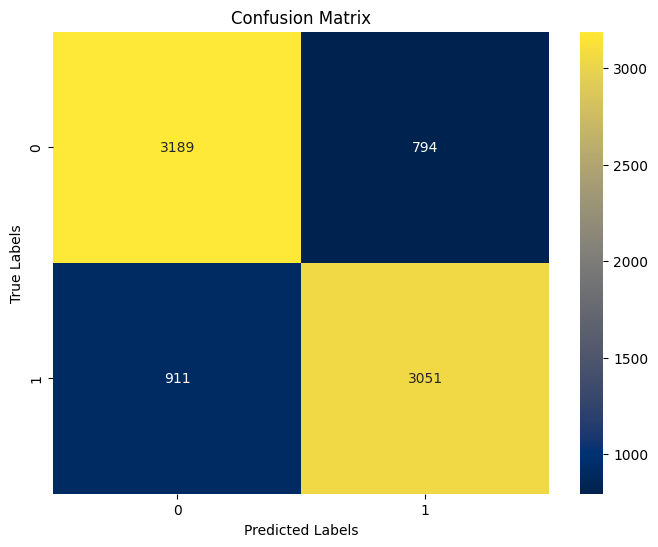

In [ ]:
# Create a heatmap of the confusion matrix - Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="cividis", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Random forest

# Calculate Training Accuracy
tr_accuracy_rf = model_rf.score(x_train, y_train)

# Calculate Testing Accuracy
te_accuracy_rf = model_rf.score(x_test, y_test)

# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate Precision
precision_rf = precision_score(y_test, y_pred_rf)

# Calculate Recall
recall_rf = recall_score(y_test, y_pred_rf)

# Calculate F1 Score
f1_rf = f1_score(y_test, y_pred_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print("Confusion Matrix:")
print(cm_rf)

Accuracy: 0.8446821900566394
Precision: 0.8497435897435898
Recall: 0.8364462392730944
F1 Score: 0.8430424828287968
Confusion Matrix:
[[3397  586]
 [ 648 3314]]


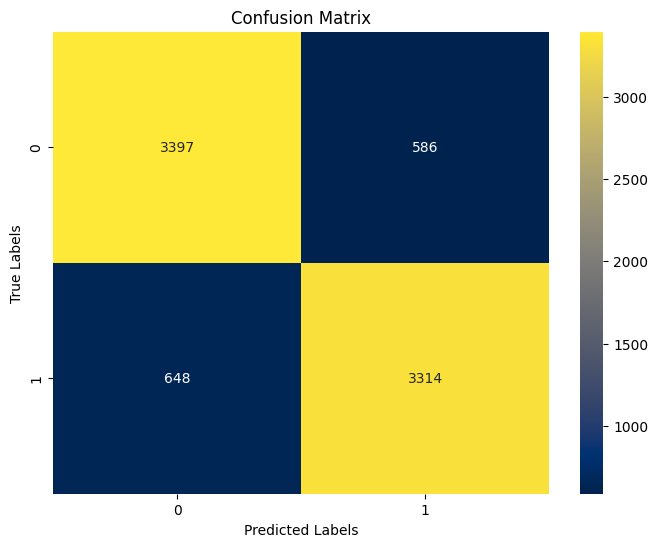

In [ ]:
# Create a heatmap of the confusion matrix - Random forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="cividis", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Logistic regression

# Calculate Training Accuracy
tr_accuracy_lg = model_lg.score(x_train, y_train)

# Calculate Testing Accuracy
te_accuracy_lg = model_lg.score(x_test, y_test)

# Calculate Accuracy
accuracy_lg = accuracy_score(y_test, y_pred_lg)

# Calculate Precision
precision_lg = precision_score(y_test, y_pred_lg)

# Calculate Recall
recall_lg = recall_score(y_test, y_pred_lg)

# Calculate F1 Score
f1_lg = f1_score(y_test, y_pred_lg)

# Confusion Matrix
cm_lg = confusion_matrix(y_test, y_pred_lg)

print(f"Accuracy: {accuracy_lg}")
print(f"Precision: {precision_lg}")
print(f"Recall: {recall_lg}")
print(f"F1 Score: {f1_lg}")
print("Confusion Matrix:")
print(cm_lg)

Accuracy: 0.8859660163624922
Precision: 0.8765401675702317
Recall: 0.897778899545684
F1 Score: 0.8870324189526184
Confusion Matrix:
[[3482  501]
 [ 405 3557]]


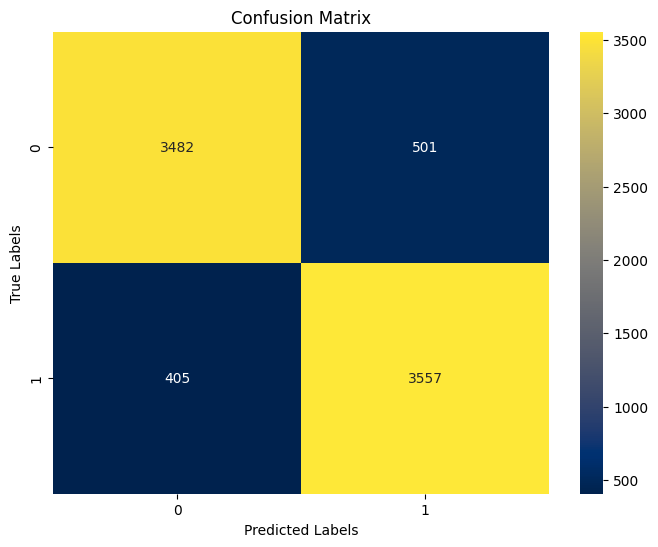

In [ ]:
# Create a heatmap of the confusion matrix - Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=True, fmt="d", cmap="cividis", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

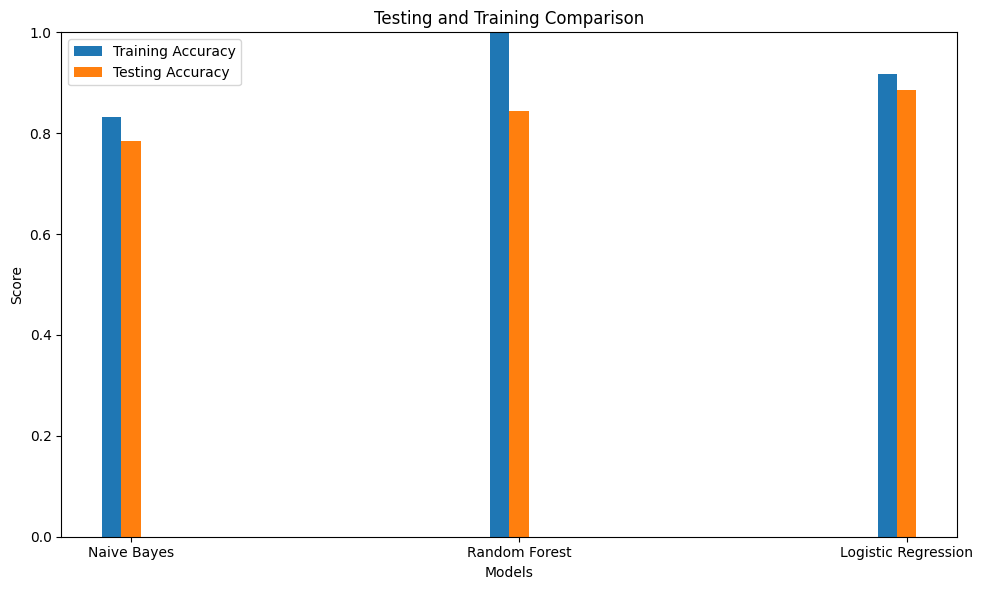

In [ ]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.05

# Calculate the x positions for the bars
x_pos = np.arange(len(['Naive Bayes', 'Random Forest', 'Logistic Regression']))

# Plot metrics
plt.bar(x_pos - bar_width, [tr_accuracy_nb, tr_accuracy_rf, tr_accuracy_lg], width=bar_width, label='Training Accuracy')
plt.bar(x_pos, [te_accuracy_nb, te_accuracy_rf, te_accuracy_lg], width=bar_width, label='Testing Accuracy')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Testing and Training Comparison')
plt.xticks(x_pos, ['Naive Bayes', 'Random Forest', 'Logistic Regression'])
plt.legend()

# Display the plot
plt.ylim(0, 1)  # Limit y-axis to range between 0 and 1
plt.tight_layout()
plt.show()

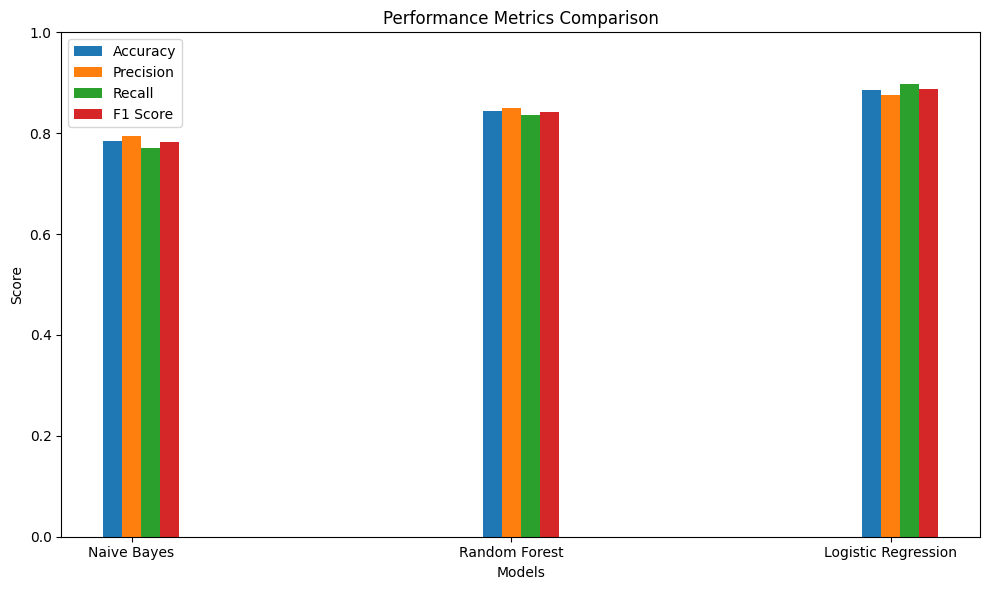

In [ ]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.05

# Calculate the x positions for the bars
x_pos = np.arange(len(['Naive Bayes', 'Random Forest', 'Logistic Regression']))

# Plot metrics
plt.bar(x_pos - bar_width, [accuracy_nb, accuracy_rf, accuracy_lg], width=bar_width, label='Accuracy')
plt.bar(x_pos, [precision_nb, precision_rf, precision_lg], width=bar_width, label='Precision')
plt.bar(x_pos + bar_width, [recall_nb, recall_rf, recall_lg], width=bar_width, label='Recall')
plt.bar(x_pos + 2 * bar_width, [f1_nb, f1_rf, f1_lg], width=bar_width, label='F1 Score')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.xticks(x_pos, ['Naive Bayes', 'Random Forest', 'Logistic Regression'])
plt.legend()

# Display the plot
plt.ylim(0, 1)  # Limit y-axis to range between 0 and 1
plt.tight_layout()
plt.show()

Logistic regression appears to be the best fittable model whereas Naive Bayes is the worst fittable model.

Logistic regression is a suitable option for this project as the text classification task involves linear relationships between features and sentiment.
Furthermore, Random Forest's randomness during the training process leads to a diverse set of decision trees. This variability may have resulted in improved generalization performance.
Naive Bayes might have performed less effectively compared to the other models due to reasons like contextual dependencies and data complexities.

# **Summary of your project**

This project involves sentiment recognition using machine learning techniques. The goal is to classify large amounts of random text data as positive or negative based on their textual content. The dataset includes textual data and corresponding labels (0 for negative, 1 for positive). The project focuses on preprocessing and visualizing the dataset, as well as building and evaluating machine learning models for sentiment classification.

The results depict that Logistic Regression Model performs the best, followed by Random Forest and lastly, Naive Bayes.